In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats as stats
output = "Output"

In [3]:
#pull in data
movie_data = "MoviesOnStreamingPlatforms_updated.csv"
movie_df = pd.read_csv(movie_data)
movie_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
#clean data
clean_df = movie_df.dropna(subset=['Year'], how="any")
clean_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
#drop not needed columns
year_df = clean_df.drop(clean_df.columns[[-1,-2,-3,-4, -5]], axis=1)
year_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0


In [6]:
#combine streaming platforms into one category

#year_df['Streaming Platform'] = year_df.loc[(df['Netflix']== "1") | (df['Hulu']== "1") | (df['Prime Video']== "1") | (df['Disney+']== "1"), :]
#streaming_platform.head()
year_df.loc[year_df['Netflix']== 1, 'Streaming Platform'] = 'Netflix'
year_df.loc[year_df['Hulu']== 1, 'Streaming Platform'] = 'Hulu'
year_df.loc[year_df['Prime Video']== 1, 'Streaming Platform'] = 'Prime'
year_df.loc[year_df['Disney+']== 1, 'Streaming Platform'] = 'Disney+'
year_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Streaming Platform
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Netflix
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,Netflix
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,Netflix
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Netflix
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Prime


In [7]:
#find year values for each bin
year_df['Year'].value_counts()

2017    1401
2018    1285
2016    1206
2015    1065
2014     986
        ... 
1924       1
1912       1
1916       1
1917       1
1902       1
Name: Year, Length: 109, dtype: int64

In [9]:
#create bins
bins = [1900, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2020]
group_names = ["Early 1900's", "1950's", "1960's", "1970's", "1980's", "1990's", "Early 2000's", "Current"]

year_df['Year Category']= pd.cut(year_df['Year'], bins, labels=group_names, include_lowest=True)
year_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Streaming Platform,Year Category
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Netflix,Current
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,Netflix,1990's
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,Netflix,Current
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Netflix,1980's
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Prime,1960's


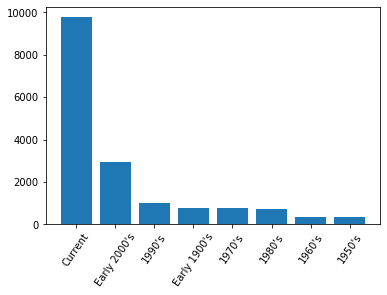

In [36]:
#plot 
year_list = year_df['Year Category'].value_counts()
year_list.index
list(year_list)
plt.bar(year_list.index, list(year_list))
plt.xticks(rotation=55)
#count_chart.set_xlabel("Year Category")
#count_chart.set_ylabel('Streaming Platform')
plt.show()

In [11]:
year_counts = year_df['Year Category'].value_counts()
year_category_counts_df = pd.DataFrame(year_counts)
year_category_counts_df

,Year Category
Current,9764
Early 2000's,2940
1990's,1002
Early 1900's,785
1970's,769
1980's,750
1960's,375
1950's,359


In [26]:
streaming_platform_counts = year_df['Streaming Platform'].value_counts()
platform_counts = pd.DataFrame(streaming_platform_counts)
platform_counts

,Streaming Platform
Prime,12335
Netflix,3188
Hulu,657
Disney+,564


In [42]:

year_analysis = year_df.groupby(['Year Category'])[['Disney+', 'Netflix', 'Hulu', 'Prime Video']].sum()
year_analysis
year_analysis2 = year_analysis.T

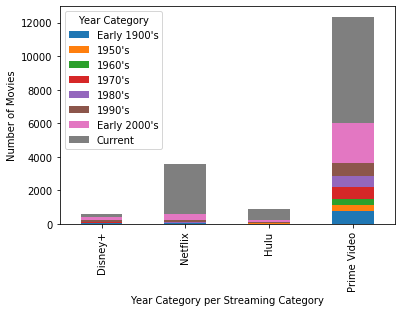

In [45]:
count_chart = year_analysis2.plot(kind='bar', stacked=True)
count_chart.set_xlabel("Year Category per Streaming Category")
count_chart.set_ylabel('Number of Movies')

plt.show()

In [ ]:
#check list of movies within the past 5 years

In [28]:
#bar plot per each streaming platform vs number of movies made per year

In [ ]:
#pull in ratings per previous graphs